## Final Project Submission - Phase 3

* Student name: **GROUP 3**
* Members: **Maureen Wangonyo, Jael Akech, MariaCharlote Mbiyu, Muthoni Kahura, Stephen Ndirangu, Stephen Gathai, Kithinji Murungi.**
* Student pace: **Part Time**
* Scheduled project review date/time:**20th June 2023**

# Project Overview 

# 1.0 Business Understanding

<img src="./Images/Customer-Churn.png">

### 1.1 Background

**SyriaTel** is a telecommunications company facing the challenge of customer churn. <br>
*What is customer churn?* This is the rate at which customers leave a business <br>
According to Forbes Advisor an article by Monique Danao, published 2nd March 2023 at 11.00am, Customer churn rate, "refers to the rate at which subscribers or customers stop transacting with your business." https://www.forbes.com/advisor/business/churn-rate/

Churn can have significant financial implications for SyriaTel, including the loss of recurring revenue, increased customer acquisition costs, and potential negative impact on the company's reputation. 

To address this issue, SyriaTel have requested **CodeTribe3** researchers to build a churn prediction system that can identify customers likely to churn in the near future.


### 1.2 Project Question

The Project seeks to investigate :

*Are there any predictable or discernible patterns in customer behaviour that can aid in identification of customers who are likely to churn from SyriaTel Telecommunications company?*

### 1.3 Objectives

In order to answer the project question above and guide the research activities, project objectives that are specific and measurable have been formulated as shown below:

* Develop a predictive model using machine learning algorithms that classifies customers as churned or non-churned.
          
* Evaluate the performance of the predictive model using appropriate evaluation metrics.

* Identify key features or patterns in the data that are predictive of customer churn. Where,
    * We assess whether the number of outbound calls or data usage affects churn.
    * We identify if the number of customer service calls has a relationship to churning.
    * We determine if the time of day influences churn.
    * We Identify whether the Area code has a relationship to churning
    * We investigate if there is a relationship between churning and the state one lives in
    
* Provide recommendations for proactive customer retention strategies based on the insights gained from the analysis.


### 1.4 Stakeholders
The primary focus of our research lies with **SyriaTel Telecommunications Company**, our key stakeholder.<br>
We will concentrate on three specific departments, namely:
 * Top Management
 * Marketing Team
 * Customer Retention Team

### 1.5 Hypothesis

**H0: The number of customer service calls has no relationship to churn<br>**
H1: The number of customer service calls is related to churn

**H0: Customers who have a shorter tenure with SyriaTel are more likely to churn <br>**
H1:

**H0: Customers who have a high number of outbound calls or data usage are less likely to churn**<br>
H1

# 2.0 Data Understanding

In [105]:
!pip install pyforest
!pip install buckaroo


In [106]:
#import necessary libraries
from pyforest import *
import buckaroo
from ipywidgets import interact

In [107]:
#import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style. use('seaborn')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [108]:
#load the data and read 1st 5 lines
df = pd.read_csv('./bigml_59c28831336c6604c800002a.csv')
df.head(10)

BuckarooWidget(commandConfig={'argspecs': {'dropcol': [None], 'to_datetime': [None], 'safeint': [None], 'filln…

In [109]:
@interact
def analyze_dataset(file_path='./bigml_59c28831336c6604c800002a.csv'):
    df = pd.read_csv(file_path)

    # Dataset shape
    print("Shape of the dataset:", df.shape, '\n')
    print("*"*39)

    # Missing values
    print("Null Values count:", df.isnull().sum(), '\n')
    print("*"*39)

    # Duplicate values
    print("Number of duplicates:", len(df.loc[df.duplicated()]), '\n')
    print("*"*39)

    # Target value count
    print("Count of each value of target:")
    print(df['churn'].value_counts(normalize=True), '\n')
    print("*"*39)

    # Unique values
    print("The unique values per column are:")
    print(df.nunique(), '\n')
    print("*"*39)

    # Dataset information
    print("Information about the dataset:")
    print(df.info())

    # Distribution
    display(df.describe())


interactive(children=(Text(value='./bigml_59c28831336c6604c800002a.csv', description='file_path'), Output()), …

### Summary on the Data
The dataset utilised in this research project contains information about customer attributes, call usage, charges and customer service interactions with the churn column acting as our target variable.

The dataset contains 3333 rows(number of entries) and 20 columns.

The column names and their respective descriptions  are: <br>
1. *account length*: The number of days the customer has been an active customer.
2. *area code*: The area code of the customer's phone number.
3. *phone number*: The customer's phone number.
4. *international plan*: Indicates whether the customer has an international calling plan.
5. *voice mail plan*: Indicates whether the customer has a voicemail plan.
6. *number vmail messages* : Represents the number of voicemail messages the customer has.
7. *total day minutes*: The total number of minutes the customer has used during the day.
8. *total day calls*: The total number of calls the customer has made during the day.
9. *total day charge*: The total charge in dollars for the day's usage.
10. *total eve minutes*: The total number of minutes the customer has used during the evening.
11. *total eve calls*: The total number of calls the customer has made in the evening.
12. *total eve charge*: The total charge in dollars for the evening's usage.
13. *total night minutes*: The total number of minutes the customer has used during the night.
14. *total night calls*: The total number of calls the customer has made during the night.
15. *total night charge*: The total charge in dollars for the night's usage.
16. *total intl minutes*: The total number of international minutes the customer has used.
17. *total intl calls*: The total number of international calls the customer has made.
18. *total intl charge*: The total charge in dollars for the international usage.
19. *customer service calls*: The number of customer service calls made by the customer.
20. *churn*: Indicating whether the customer has churned or not.

The data is categorised by 4  data types: <br>

   * Bool -  1 column (churn)<br>
   * Float64 -  8 columns (total day minutes, total day charge, total eve minutes, total eve charge, total night minutes, total night charge - total intl minutes, total intl charge)<br>
   * Int64 -  8 columns (account length, area code, number vmail messages, total day calls, total eve calls, total night calls, total intl calls, customer service calls)<br>
   * Object -  3 columns (phone number, international plan, voice mail plan)<br>

The dataset consumes approximately 524.0 KB of memory

# 3.0 Data Preparation

## 3.1 Data Cleaning
<img src = "./images/clean.webp">

In this step, the data is cleaned and prepared to ensure data quality and reliability for subsequent analysis.<BR>
We start with:

1. Dropping unnecessary columns such as "phone number" that are not relevant for the analysis and modeling process.

2. Identifying and handling missing values if any. In this specific dataset there are no NAN's(Not a Number).

3. Check for duplicate entries in the unique column id.

4. Deal with outliers that might have a significant impact on the analysis.


In [110]:
#creating an a copy of the dataframe 
df2=df.copy()

### Dealing with unnecessary columns

In [111]:
#Check for duplicates in Unique column
duplicate_no = df.duplicated(subset = 'phone number')
print( f"""" we have a total of {duplicate_no.sum()} duplicates out of {df2.shape[0]} entries""")

" we have a total of 0 duplicates out of 3333 entries


In [112]:
#Drop unnecessary columns i.e Phone number
df2 = df.drop(['phone number'], axis=1)

### Dealing with Outliers using Z-score

In [113]:
print("length of the dataframe with outliers: ",len(df), '\n')
print("*"*50, '\n')


def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    

drop_numerical_outliers(df)
print("length of the dataframe after droping outliers: ",len(df))

length of the dataframe with outliers:  3333 

************************************************** 

length of the dataframe after droping outliers:  3169


# 4.0 Exploratory Data Analysis

In this step we analyze and summarize the data in order to understand its main characteristics, uncover patterns, and identify potential relationships and insights.

   * Univariate , Bivariate and Multivariate analysis are covered in this section.
   * dot describe() is also utilised to further describe the variables in terms of their central tendancy, variability and range.


## 4.1 Univariate Analysis

### a) Categorical Features

Text(0.5, 1.0, 'Target Variable')

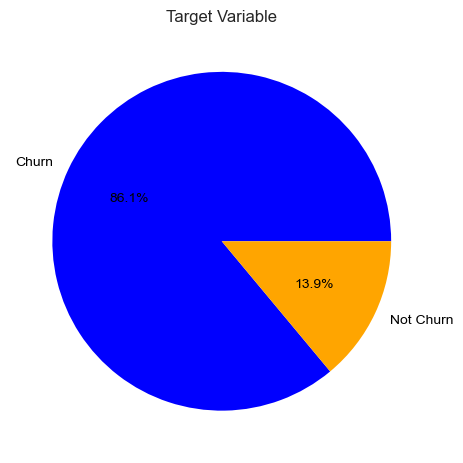

In [114]:
plt.pie(data = df['churn'].value_counts().to_frame() ,labels = ['Churn','Not Churn'], x = 'churn' , autopct = '%1.1f%%' ,colors = ['blue','orange'],textprops={'color':"black"} )
plt.title('Target Variable')

* The dataset indicates the target variable "churn" i.e whether a customer has churned or not. 
* Approximately 14.5% of the data corresponds to customers who have churned, while the remaining 85.5% represents customers who have not churned.

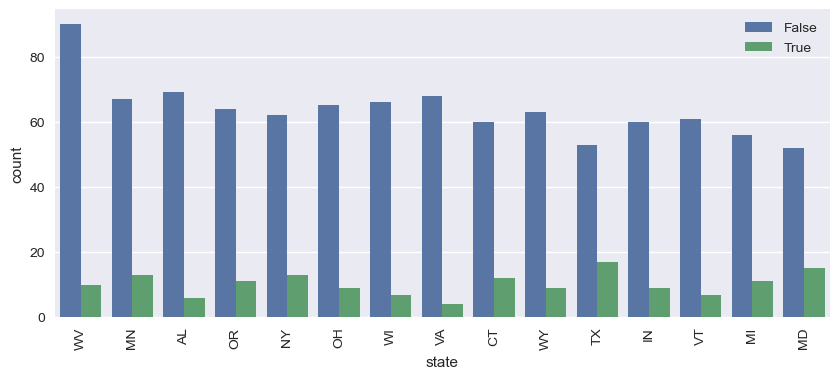

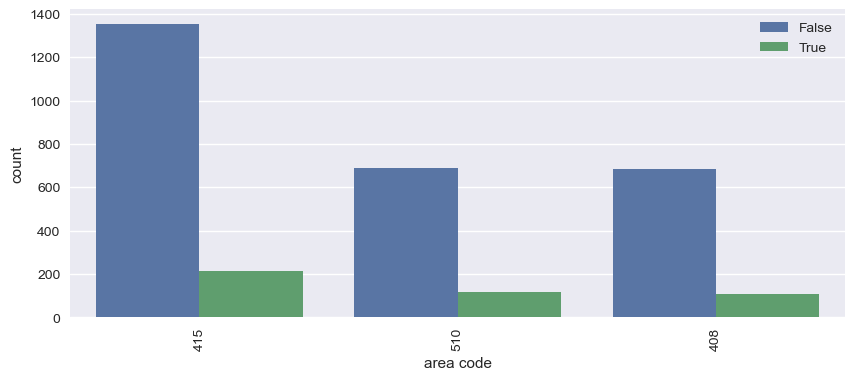

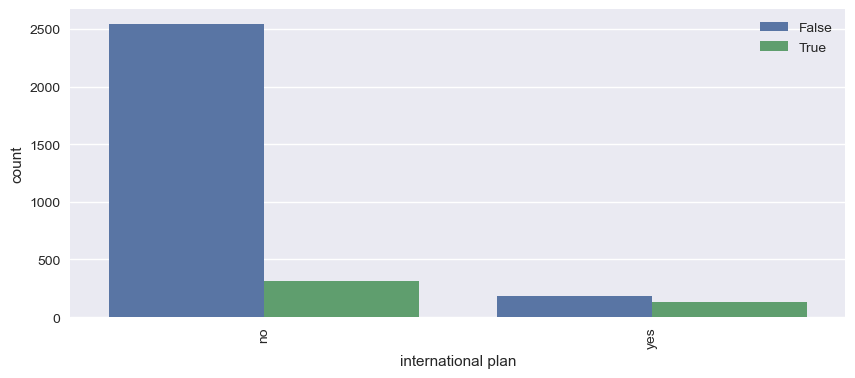

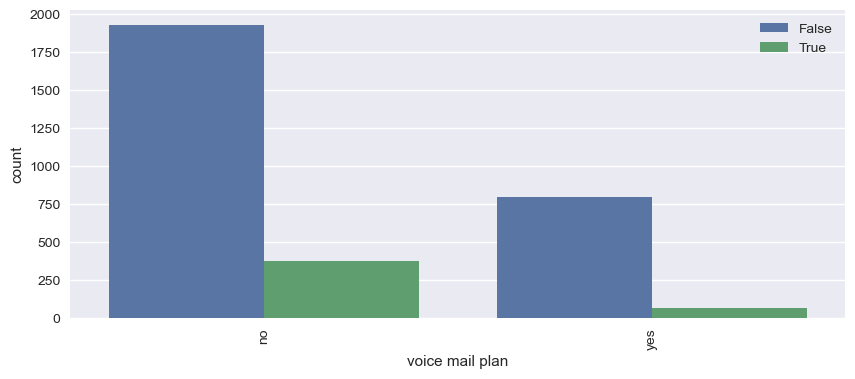

In [115]:
categorical_cols = ['state', 'area code', 'international plan', 'voice mail plan']

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, hue="churn", data=df, order=df[col].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()


### b) Numerical Columns 

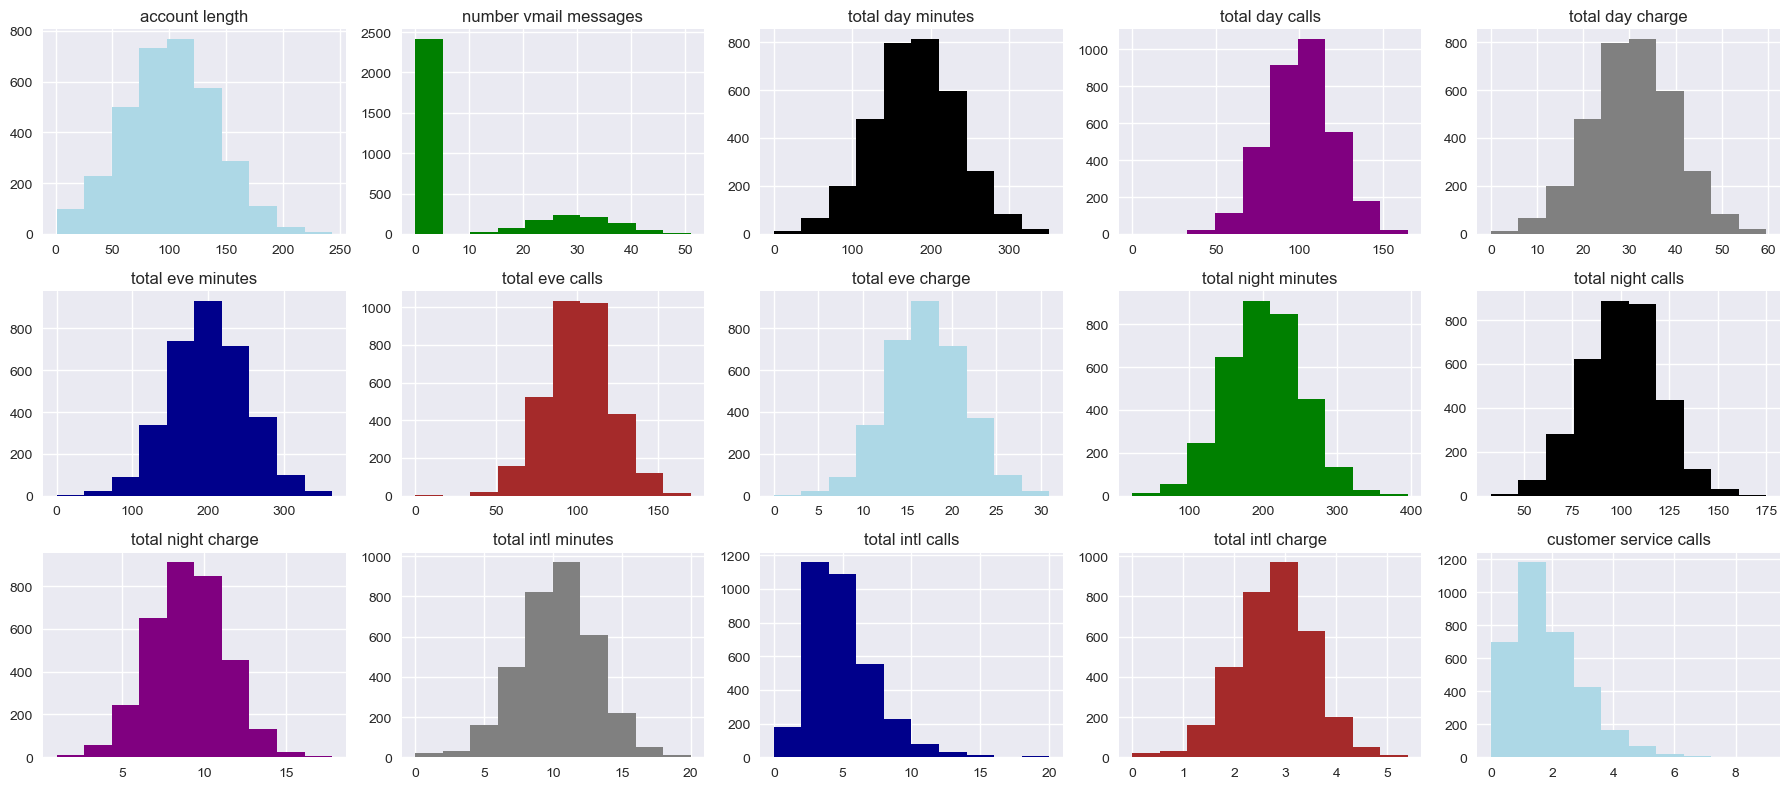

In [116]:
# Get the list of numerical columns
numerical_columns = df2.select_dtypes(include='number').columns
numerical_columns = numerical_columns.drop(['area code'])

# Calculate the number of subplots based on the number of numerical columns
num_subplots = len(numerical_columns)

# Calculate the number of rows and columns for the subplots
num_rows = int(num_subplots ** 0.5)
num_cols = num_subplots // num_rows

# Adjust the number of rows and columns if necessary
if num_rows * num_cols < num_subplots:
    num_cols += 1

# Set up the plot
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 8))

# Flatten the axes array if necessary
if num_subplots == 1:
    axes = [axes]

# Define a color palette for the histograms
colors = ['lightblue', 'green', 'black', 'purple', 'grey', 'darkblue', 'brown']

# Plot each numerical column with a different color
for i, column in enumerate(numerical_columns):
    ax = axes[i // num_cols, i % num_cols]
    ax.hist(df2[column], color=colors[i % len(colors)])
    ax.set_title(column)

# Remove any empty subplots
for j in range(num_subplots, num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Minimum amount of calls: state
CA    10431
Name: all calls, dtype: int64 
 Maximum amount of calls: state
WV    32055
Name: all calls, dtype: int64


<AxesSubplot:title={'center':'Number of calls per state'}, xlabel='Amount of calls', ylabel='state'>

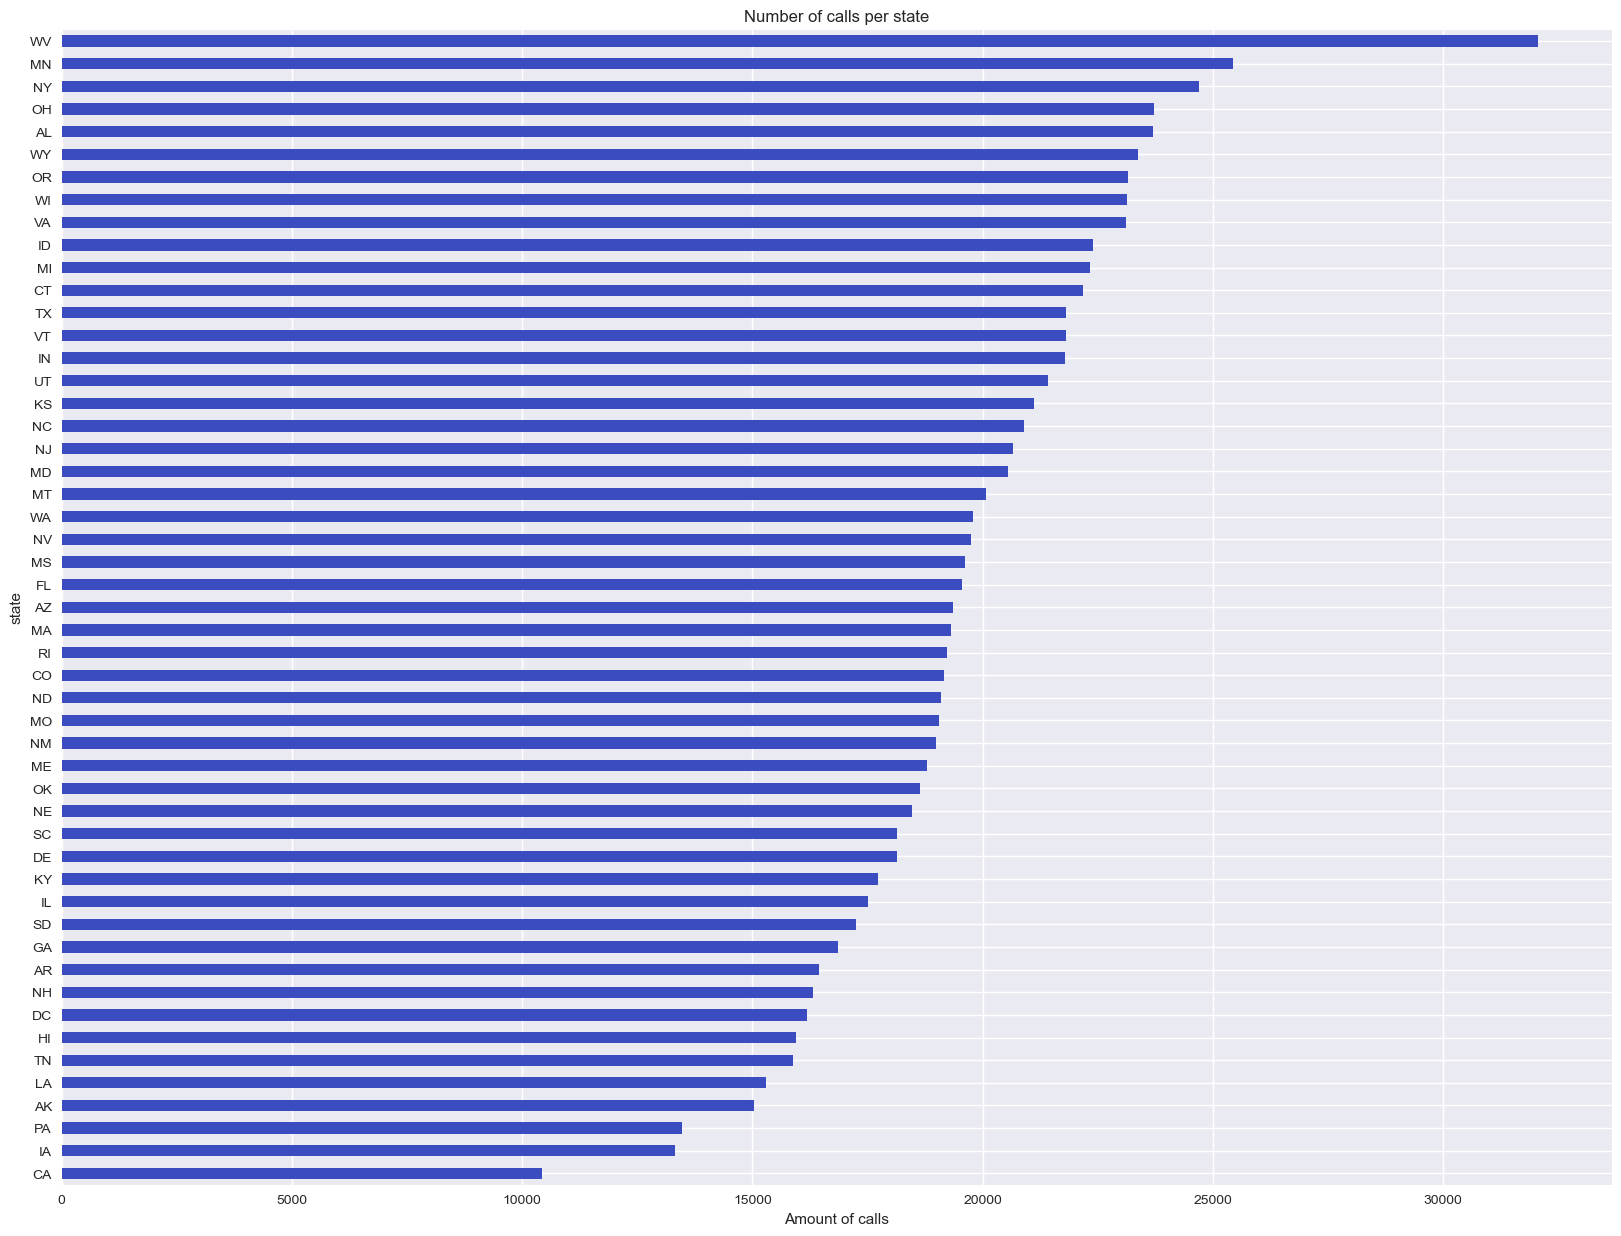

In [117]:
df2['all calls'] = df2['total day calls'] + df2['total eve calls'] + df2['total night calls']

state_calls = df2.groupby('state')['all calls'].sum().sort_values()
print('Minimum amount of calls:', state_calls[state_calls == state_calls.iloc[0]],'\n','Maximum amount of calls:', state_calls[state_calls == state_calls.iloc[-1]])
plt.xlabel('Amount of calls')
plt.ylabel('State')
plt.title('Number of calls per state')
state_calls.plot(kind='barh', figsize=(20, 15), colormap='coolwarm')


It was noted that the state of WV had the highest number of total calls made at 32,055 while CA had the lowest calls  at 10,431 <br>
Most states ranged between 15,000 calls and 22,000 calls.

In [118]:
# drop created extra column 'all calls'
df3 = df2.drop('all calls', axis=1)

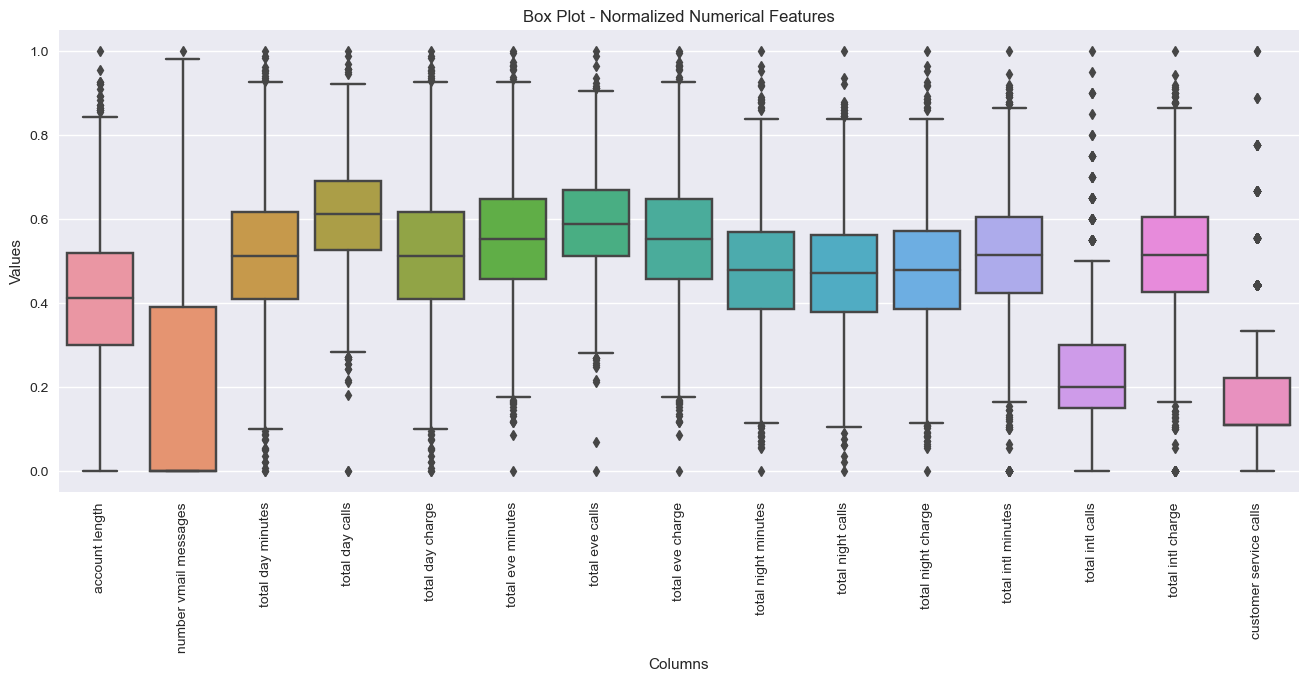

In [119]:
from sklearn.preprocessing import MinMaxScaler

fig, ax = plt.subplots(figsize=(16, 6))

# Scale the numerical columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df3[numerical_columns])

# Convert the scaled data back to a dataframe
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Plot the box plots for each normalized column
sns.boxplot(data=scaled_df, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Set the title and labels
ax.set_title('Box Plot - Normalized Numerical Features')
ax.set_xlabel('Columns')
ax.set_ylabel('Values')

# Show the plot
plt.show()

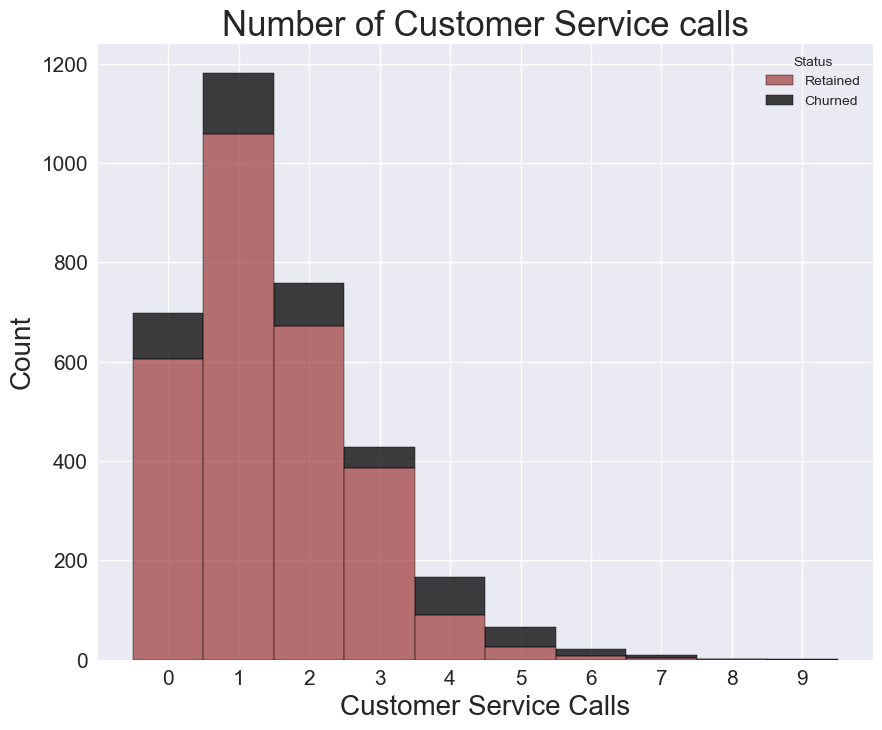

In [120]:
# Is there a relationship between No of customer service calls and churning?

fig,ax = plt.subplots(figsize=(10,8))

bins = np.arange(11) - 0.5

ax = sns.histplot(
    df2,
    x='customer service calls',
    hue='churn',
    multiple='stack',
    hue_order=[1,0],
    bins=bins,
    palette=['#0000', '#A44444']

)

ax.set_title('Number of Customer Service calls', fontsize = 25)
ax.set_xlabel("Customer Service Calls", fontsize = 20)
ax.set_ylabel("Count", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(range(10), fontsize = 15)
plt.xlim([-1, 10])

ax.legend(title= "Status", labels = ["Retained", 'Churned'])


In [121]:
#create Transposed descriptive summary of numerical columns
df3[numerical_columns].describe().T

BuckarooWidget(commandConfig={'argspecs': {'dropcol': [None], 'to_datetime': [None], 'safeint': [None], 'filln…

### Summary of Univariate Analysis

1. **Account length:**
   - On average, customers have been with the telecommunications company for around 101 days.
   - The shortest account length being 1 day, and the longest is 243 days.
   - Most customers have an account length between 74 and 127 days.

2. **Area code:**
   - The dataset includes different area codes that represent the geographical regions where customers are located.
   - The dataset covers area codes ranging from 408 to 510.

3. **Number voicemail messages:**
   - On average, customers receive around 8 voicemail messages.
   - The number of voicemail messages varies, with some customers not having a voicemail plan 
   - The highest number of received voicemails is 51.

4. **Total day minutes,Total day calls and Total day charge**
   - On average, customers spend approximately 180 minutes on daytime calls.
   - The minutes may vary from 0 minutes to a maximum of 351 minutes.
   - Customers make around 100 calls during the day. 
   - Certain  days,customers make no calls. The maximum number of calls made so far has been 165 calls.
   - On average, customers are charged approximately USD 30 for daytime calls.
   - The range of charges varies from USD 0 to a maximum of USD 60.


5. **Total evening minutes, Total evening calls and Total evening charge**
   - Customers spend around 201 minutes with a maximum of 364 minutes on evening calls
   - On average, customers make approximately 100 calls during the evening.
   - Customers are charged around USD 17  and a maximum of USD 31 for evening calls.


6. **Total night minutes,Total night calls and Total night charge**
    - Customers spend approximately 201 minutes on nighttime calls.
    - The call minutes range from 23 minutes to a maximum of 395 minutes.
    - They make on average around 100 calls during the night which cost them 9USD for night calls
    - The charges however range from USD 1 to a maximum of USD 18.

7. **Total international minutes, calls and charge:**
    - On average, customers spend around 10 minutes on international calls.
    - However the duration may vary from 0 minutes to a maximum of 20 minutes.
    - Customers make around 4 international calls and a maximum of 20.
    - The customers are charged around USD 2.76 for international calls and a maximum of USD 5.40<br>

8. **Customer service calls:**
    - On average, customers make approximately 2 calls to customer service.
    - The maximum number of customer service calls 9 but most customers range between 1 to 2 calls.


## 4.2 Bivariate & MultiVariate Analysis

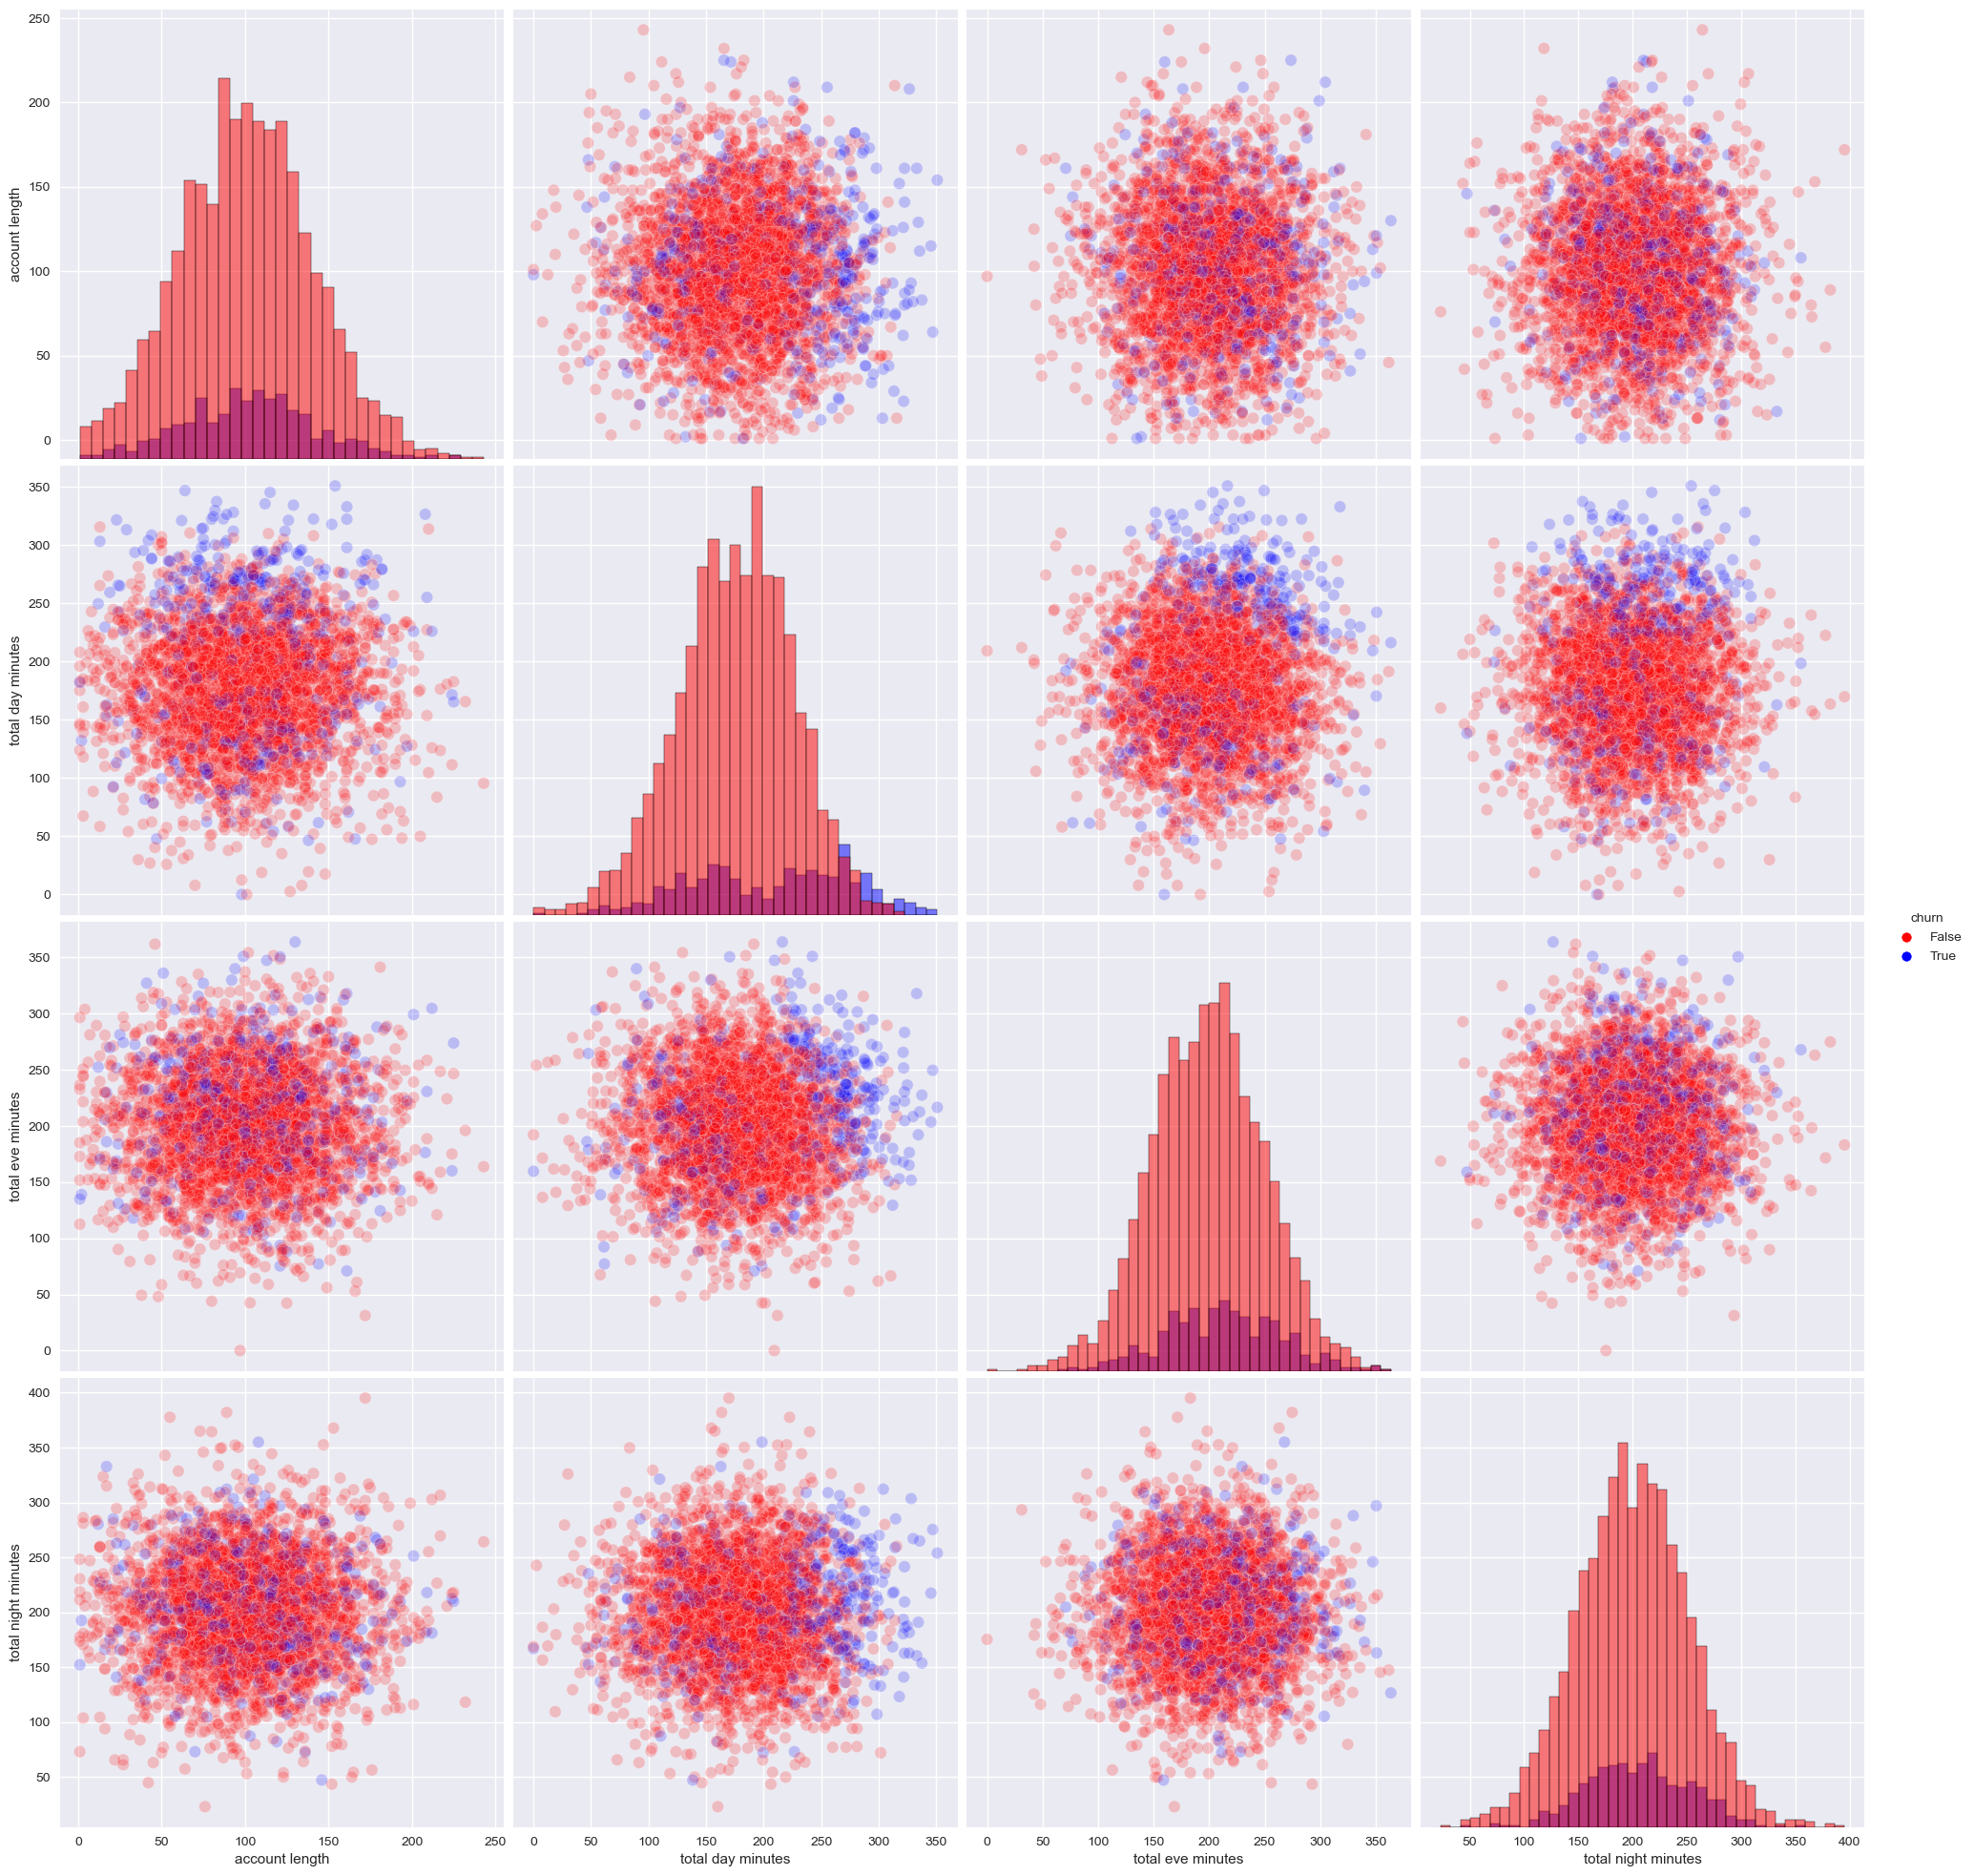

In [122]:
custom_palette = {True: 'blue', False: 'red'}  # Specify the desired colors for each category

sns.pairplot(df3[['account length', 'total day minutes', 'total eve minutes', 'total night minutes', 'churn']],
             diag_kws={'color': '#c68e17'},
             plot_kws={'alpha': 0.2, 's': 80, 'edgecolors': '#864401'},
             hue='churn',
             palette=custom_palette,
             height=5,
             aspect=1,
             diag_kind='hist')


### Summary of Bivariate & Multivariate Analysis

The **Bivariate Analysis** has considered the 4 features against 'churn'.
 - 'account length'
 - 'total day minutes' 
 - 'total eve minutes' 
 - 'total night minutes'

The four features exhibit a positive relationship with churn. This means that as these variables increase, the likelihood of churn also increases and viceversa.

The **Multivariate analysis** examines various combinations of features while keeping churn as the constant variable. Some of the combinations explored include:
- 'account length' vs 'total night minutes',
- 'total day minutes' vs 'total night minutes', 
- 'total eve minutes' vs 'account length', 
- 'total night minutes' vs 'total eve minutes'.

In these combinations, it is observed that a higher likelihood of churning is associated with the presence of higher total day minutes.

## 4.3 Multicollinearity of Features

In this section, we explore the possibility of linear dependency (multicollinearity) between the features which can pose a challenge in the interpretation of our created model and affect the accuracy of the estimated coefficients.

This section is important because it: 
1. Enables us to identify and deal with multicollinearity in different ways. 
2. Ensures appropriate feature selection.
3. improves reliability and stability of our analysis.


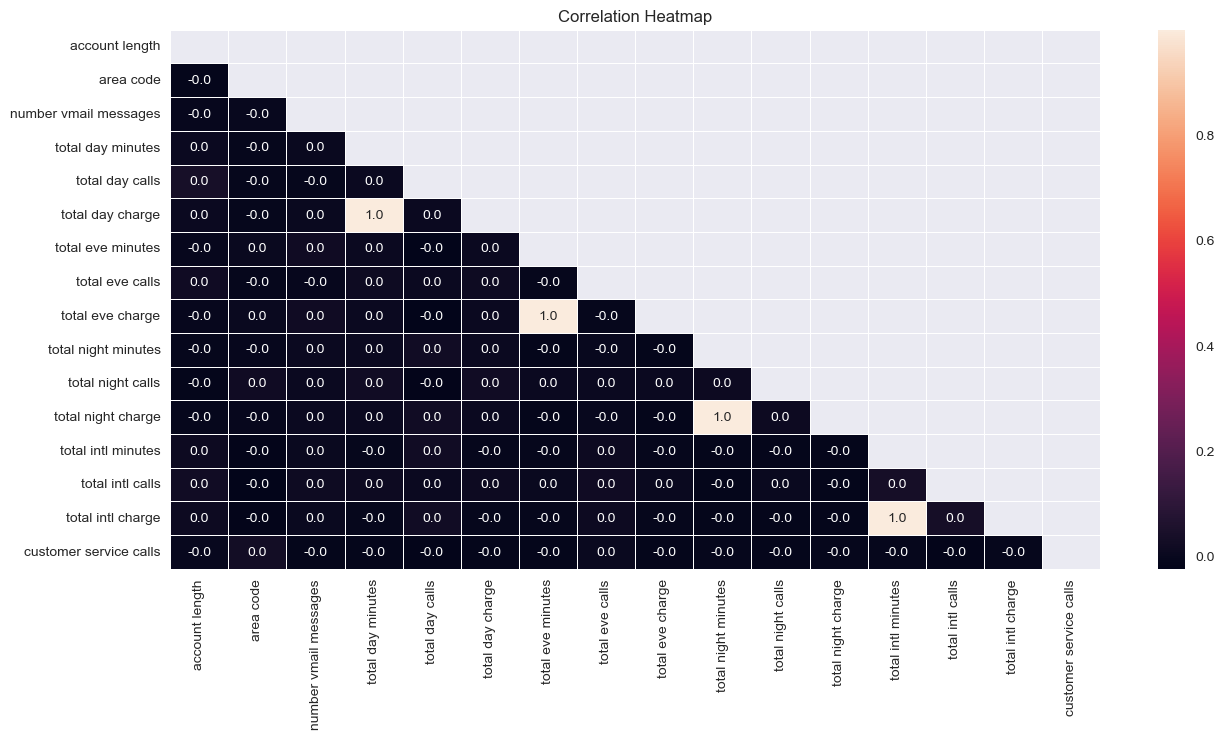

In [123]:
# Filter numeric columns
numeric_columns = df3.select_dtypes(include=np.number)

# Create a heatmap for the numeric features
fig, ax = plt.subplots(figsize=(15, 7))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(numeric_columns.corr(), dtype=bool))
sns.heatmap(numeric_columns.corr(), annot=True, linewidths=0.5, fmt=".1f", ax=ax, mask=mask)
plt.title('Correlation Heatmap')
plt.show()

### Summary of Correlation HeatMap

- **Positive Correlation:**

The features total day minutes, total day charge, total evening minutes, total evening charge, total international minutes, and customer service calls have a positive correlation with 'churn'. <br>
As these variables increase, the likelihood of churn also tends to increase.<br>
Churn in this case would be either False or True.<br>
It should be noted, the correlation coefficients for these variables are not very high, indicating a moderate relationship <br>

- **Negative Correlation:**

The Number of voice mail messages and total international calls has a negative correlation with 'churn'.<br>
This means that as the number of voicemail messages  and international calls increases, the likelihood of churn tends to decrease.<br>
However, the correlation coefficient for this variables is relatively low at -0.1, suggesting a weak relationship.<br>

- **Weak Correlation:**

The other variables: account length, area code, total day calls, total evening calls', total night minutes, total night calls, total night charge, 'total international calls, total international charge have correlation coefficients close to zero indicating a weak or negligible relationship between these variables and 'churn'.

# 5.0 Data Preparation: Pre-processing 

To ensure the data is suitable for prediction, it is important to format it correctly. <br>
Categorical inputs are not well-suited for Machine Learning models, so we employ techniques like label encoding and one-hot encoding to convert categorical variables in our dataset into numerical values. <br>
This conversion allows the models to effectively process the data.

### Label Encoding 
Label Encoding enables the converting of the label variables in "international plan", "voice mail plan" and "churn" columns to a numeric form.<br>
The yes and No in "International plan" and "voice mail" plan are converted to 1 and 0 representatively while False and True in churn are converted to 0 and 1. 

In [124]:
from sklearn.preprocessing import LabelEncoder

# Categorical columns
cat_cols= ["international plan", "voice mail plan", "churn"]

# Apply label encoding
def label_encoding(col_name):
  le = LabelEncoder()
  df3[col_name] = le.fit_transform(df3[col_name])

# Call the label_encoding function for each
for col_name in cat_cols:
  label_encoding(col_name)

df3

BuckarooWidget(commandConfig={'argspecs': {'dropcol': [None], 'to_datetime': [None], 'safeint': [None], 'filln…

### One hot encoding the states column

To make our algorithm compatible with categorical variables, we employ one-hot encoding. <br>
We convert the categorical variables in the 'State' column into multiple binary columns. This transformation allows us to easily use the encoded data in our algorithm.

In [125]:
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(dtype=np.int64, sparse=False)

# Encode the "state" column
encoded_state = encoder.fit_transform(df3[["state"]])

# Create a DataFrame with the encoded state columns
dummy_df_state = pd.DataFrame(encoded_state, columns=encoder.get_feature_names_out(["state"]))

# Concatenate the encoded state columns with the original DataFrame
ohe_df3 = pd.concat([df3, dummy_df_state], axis=1)

# Remove the original "state" column
ohe_df3 = ohe_df3.drop(["state"], axis=1)

ohe_df3.head(10)


BuckarooWidget(commandConfig={'argspecs': {'dropcol': [None], 'to_datetime': [None], 'safeint': [None], 'filln…

### Scaling

Scaling is crucial to enhance prediction accuracy in machine learning.<br>
It is especially important for algorithms that are sensitive to the scale of features. Scaling involves adjusting the values of multiple variables to make them comparable and fall within a consistent range. Various normalization techniques can be employed, such as setting the variable's average to 0, ensuring a variance of 1, or rescaling the variable within the range of 0 to 1.

In our specific example, we utilize the StandardScaler, which is a type of scaling method. The StandardScaler standardizes the features by subtracting the mean and dividing by the standard deviation. <br>
This transformation ensures that the features have zero mean and unit variance. By applying this scaling technique, we prepare the data to be effectively processed by machine learning models.


In [126]:
#current dataframe
df3 = ohe_df3
df3

BuckarooWidget(commandConfig={'argspecs': {'dropcol': [None], 'to_datetime': [None], 'safeint': [None], 'filln…

In [127]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df3[numerical_columns])

# convert to dataframe
df3_scaled = pd.DataFrame(scaled,columns=numerical_columns)

binary_cols = ['area code', 'churn', 'international plan', 'voice mail plan', 
        'state_AK', 'state_AL', 'state_AR', 'state_AZ',
       'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA',
       'state_ID', 'state_IL', 'state_IN', 'state_KS',
       'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO',
       'state_MS', 'state_MT', 'state_NC', 'state_ND',
       'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK',
       'state_OR', 'state_PA', 'state_RI', 'state_SC',
       'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT', 'state_WA', 'state_WI',
       'state_WV', 'state_WY', 'state_CA']

df3_scaled = pd.concat([df3_scaled, df3[binary_cols]], axis=1)

df3_scaled

BuckarooWidget(commandConfig={'argspecs': {'dropcol': [None], 'to_datetime': [None], 'safeint': [None], 'filln…

### Data Splitting

In [128]:
# Defining the X and y
X = df3_scaled.drop('churn', axis=1)
y = df3_scaled['churn'] # target

In [129]:
#Train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(2666, 69) (2666,)


In [130]:
#Check y distribution on train set
y_train.value_counts()

0    2284
1     382
Name: churn, dtype: int64

>- <b>Data is highly imbalanced, ratio = 86 : 14


### Handling class Imbalance using smote 
To ensure the models do not have poor perfomance on the minority class due to imbalance we utilise SMOT to address the imbalanced datasets. <br>
In our case we oversample the minority class by duplicating examples of the minorty class. <br>
No new information is added to the model.<br>
New examples are synthesized from the existing examples.<br>
SMOT is only used in the training data and not on the test data thus ensuring the evaluation of the model's performance reflects its ability to generalize to unseen data.

In [131]:
!pip install imbalanced-learn

In [132]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()

X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

print(X_train_smote.shape, y_train_smote.shape)

(4568, 69) (4568,)


In [133]:
y_train_smote.value_counts()

0    2284
1    2284
Name: churn, dtype: int64

# 6.0 Modelling

In [134]:
model = RandomForestClassifier()
model.fit(X_train_smote, y_train_smote)

<IPython.core.display.Javascript object>

RandomForestClassifier()

In [135]:
train_preds = model.predict(X_train_smote)
test_preds = model.predict(X_test)

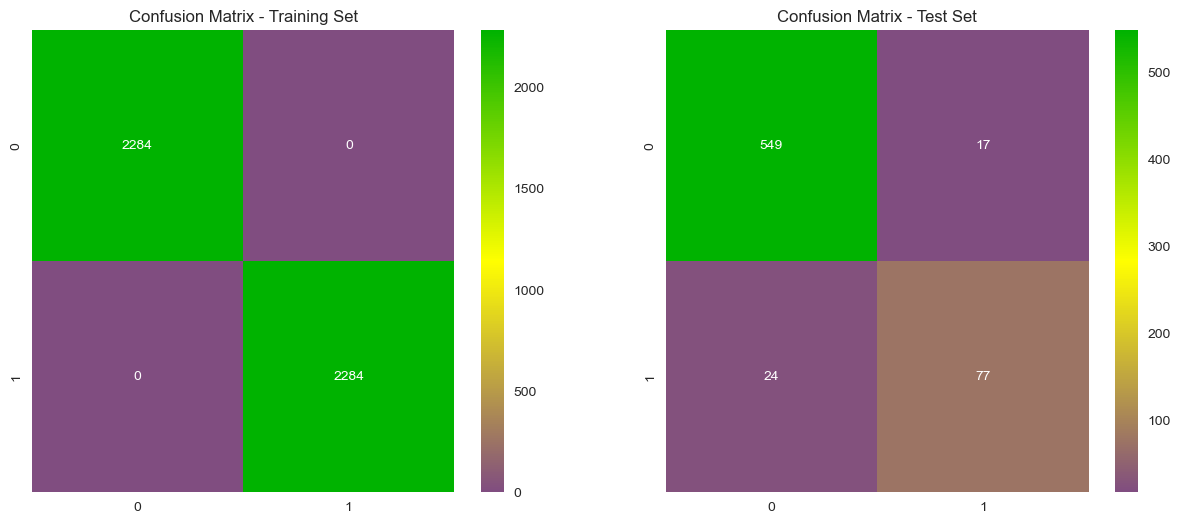

In [136]:
from sklearn.metrics import confusion_matrix
import matplotlib.colors as colors

# Compute the confusion matrix
y_pred_train = model.predict(X_train_smote)
cm_train = confusion_matrix(y_train_smote, y_pred_train)

y_pred_test = model.predict(X_test)
cm_test = confusion_matrix(y_test, y_pred_test)

# Define custom color map
cmap_colors = [(0.5, 0.3, 0.5), (1, 1, 0), (0, 0.7, 0)]  # Purple, Yellow, Green
cmap = colors.LinearSegmentedColormap.from_list('Custom', cmap_colors, N=256)

# Plot the confusion matrices with custom color map
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.heatmap(cm_train, annot=True, fmt="d", cmap=cmap, ax=ax[0])
ax[0].set_title('Confusion Matrix - Training Set')

sns.heatmap(cm_test, annot=True, fmt="d", cmap=cmap, ax=ax[1])
ax[1].set_title('Confusion Matrix - Test Set')

plt.show()


### 6.1 Model Development

### An overview with Lazy Predict 

Lazy Predict provides a comprehensive overview of how different models perform on our dataset. This allows us to have a preview before we can choose specific models to work with.<br>

Lazy Predict, simplifies the initial stages of building and evaluating machine learning models without the need for extensive coding. 


In [137]:
!pip install lazypredict

In [138]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = knn.fit(X_train_smote, X_test, y_train_smote, y_test)
print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [00:11<00:00,  2.82it/s]

[LightGBM] [Info] Number of positive: 2284, number of negative: 2284
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3978
[LightGBM] [Info] Number of data points in the train set: 4568, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:12<00:00,  2.37it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
XGBClassifier                      0.96               0.90     0.90      0.95   
LGBMClassifier                     0.95               0.90     0.90      0.95   
BaggingClassifier                  0.92               0.86     0.86      0.92   
RandomForestClassifier             0.93               0.85     0.85      0.93   
DecisionTreeClassifier             0.89               0.85     0.85      0.89   
ExtraTreesClassifier               0.92               0.79     0.79      0.91   
AdaBoostClassifier                 0.87               0.77     0.77      0.87   
NearestCentroid                    0.79               0.72     0.72      0.81   
ExtraTreeClassifier                0.78               0.70     0.70      0.80   
BernoulliNB                        0.79               0.67     0.67      0.80   
LogisticRegression          

### Model 1: Vanilla Model - Decision Tree

This is a basic or simple implementation of a classification algorithm without any additional modifications or hyperparameter tuning.<br>
In our case, Decision Tree is utilised. 

In [139]:
from sklearn.tree import DecisionTreeClassifier

# Instanciate the model
dt_model = DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8)
dt_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [140]:
# Predict the target variable for the test set
y_pred1 = dt_model.predict(X_test)

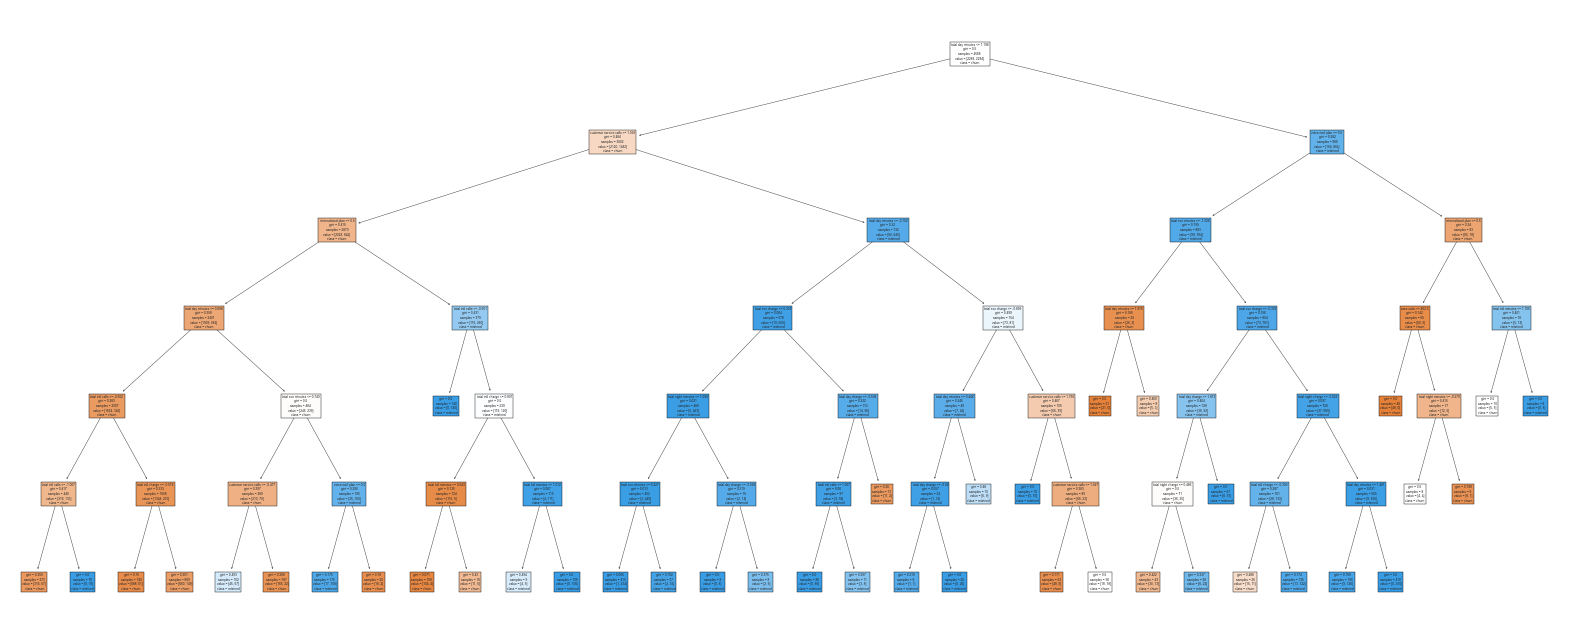

In [141]:
# plot the tree
from sklearn.tree import plot_tree

# List of feature names
feature_names = X.columns.tolist()

#visualize the Decision Tree Model
plt.figure(figsize=(20, 8))
plot_tree(dt_model, feature_names=feature_names, class_names=['churn', 'retained'], filled=True)
plt.show()

In [142]:
# confusion confusion_matrix
print("confusion_matrix for  Decision Tree \n", confusion_matrix(y_test,y_pred1))
print("*"*49)
#Print Classification report
from sklearn.metrics import classification_report

print("DecisionTree \n ",classification_report(y_test, y_pred1, labels=[0,1]))

print(" Decision Tree Test ROC AUC Score:", roc_auc_score(y_test, y_pred1))

confusion_matrix for  Decision Tree 
 [[533  33]
 [ 20  81]]
*************************************************
DecisionTree 
                precision    recall  f1-score   support

           0       0.96      0.94      0.95       566
           1       0.71      0.80      0.75       101

    accuracy                           0.92       667
   macro avg       0.84      0.87      0.85       667
weighted avg       0.93      0.92      0.92       667

 Decision Tree Test ROC AUC Score: 0.8718381555470035


### Model 2: Random Forest Classifier

This Model combines multiple decision tress to create a more accurate and robust predictive model.


In [143]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train_smote,y_train_smote)

y_pred2 = rfc.predict(X_test)

print("confusion_matrix for  Random Forest \n",confusion_matrix(y_test,y_pred2))
print("*"*49)

print("Random Forest\n ",classification_report(y_test,y_pred2))

print(" Random Forest Classifier Test ROC AUC Score:", roc_auc_score(y_test, y_pred2))

confusion_matrix for  Random Forest 
 [[548  18]
 [ 27  74]]
*************************************************
Random Forest
                precision    recall  f1-score   support

           0       0.95      0.97      0.96       566
           1       0.80      0.73      0.77       101

    accuracy                           0.93       667
   macro avg       0.88      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667

 Random Forest Classifier Test ROC AUC Score: 0.850435573592695


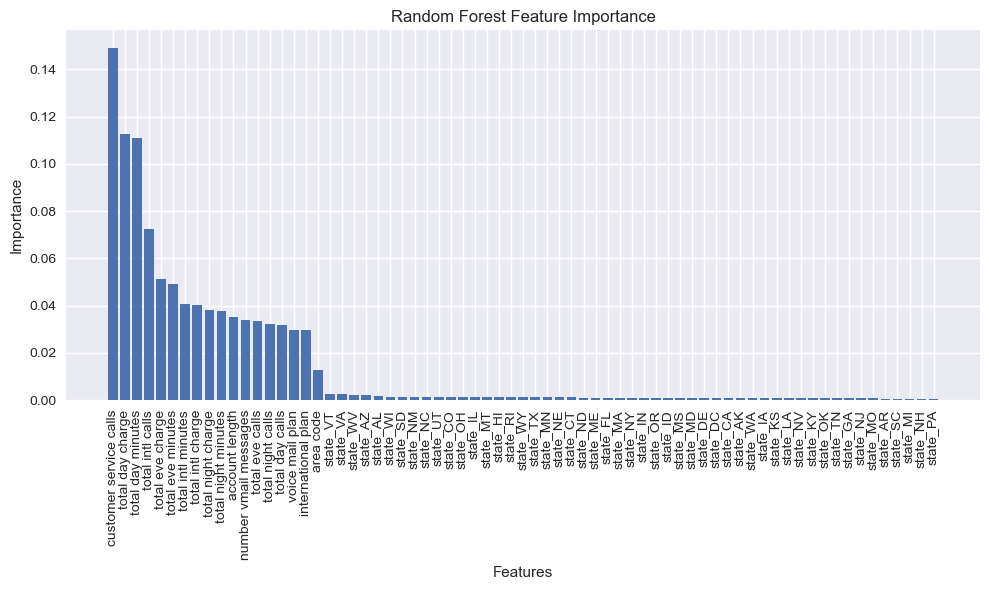

In [144]:
# Get feature importances from the random forest model
importances = rfc.feature_importances_
feature_names = X_train_smote.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

#### Hyperparameter Tuning

In [145]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV, train_test_split
# from sklearn.metrics import accuracy_score

# # Hyperparameters
# param_grid = {"max_depth": [8,15,20],
#              "n_estimators":[500,1000],
#              "min_samples_split":[5,10,15],
#              "criterion":['entropy','gini']}

# # Step 2: Split the data into training and validation sets
# # X_train_smote, X_val, y_train_smote, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # evaluation metric
# scoring = 'accuracy'

# # Grid Search
# rf_model = RandomForestClassifier(random_state=42)
# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring=scoring)
# grid_search.fit(X_train_smote, y_train_smote)

# # Step 5: Evaluate the best model on the validation set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_pred)

# # Step 6: Print the best hyperparameters and validation accuracy
# print("Best Hyperparameters:", '\n', grid_search.best_params_)
# print("Validation Accuracy:", val_accuracy)

### Model 3: K- Nearest Neighbors Classifer 

K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for both classification and regression tasks.
It is a non-parametric and instance-based algorithm that makes predictions based on the similarity of input data points to the labeled data points in the training dataset.

In KNN, the "K" refers to the number of nearest neighbors to consider when making a prediction. 


In [146]:
from sklearn.neighbors import KNeighborsClassifier

#Create an instance of KNeighborsClassifier with the desired number of neighbors (K)
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the model to the training data
knn.fit(X_train_smote,y_train_smote)

# Predict the target variable for the test set
y_pred3 = knn.predict(X_test)

# Confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix

print("confusion_matrix for KNN \n",confusion_matrix(y_test,y_pred3))
print("*"*49)

print("KNN classification_report\n ",classification_report(y_test,y_pred3))

print(" KNN Test ROC AUC Score:", roc_auc_score(y_test, y_pred3))

confusion_matrix for KNN 
 [[432 134]
 [ 40  61]]
*************************************************
KNN classification_report
                precision    recall  f1-score   support

           0       0.92      0.76      0.83       566
           1       0.31      0.60      0.41       101

    accuracy                           0.74       667
   macro avg       0.61      0.68      0.62       667
weighted avg       0.82      0.74      0.77       667

 KNN Test ROC AUC Score: 0.6836056397159151


### Model 4:  XGBOOST

<img src="./Images/giphy.gif">

In [147]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize the XGBoost model
xgboost = xgb.XGBClassifier()

# Train the XGBoost model
xgboost.fit(X_train_smote, y_train_smote)

# Make predictions on the training set
y_train_pred = xgboost.predict(X_train_smote)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
train_precision = precision_score(y_train_smote, y_train_pred)
train_recall = recall_score(y_train_smote, y_train_pred)
train_f1_score = f1_score(y_train_smote, y_train_pred)
train_roc_auc = roc_auc_score(y_train_smote, y_train_pred)

# Make predictions on the test set
y_test_pred = xgboost.predict(X_test)

print("XG Boost classification_report\n",classification_report(y_test, y_test_pred))


print("XG Boost Test ROC AUC Score:", roc_auc_score(y_test, y_test_pred))

XG Boost classification_report
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       566
           1       0.88      0.81      0.85       101

    accuracy                           0.96       667
   macro avg       0.92      0.90      0.91       667
weighted avg       0.95      0.96      0.95       667

XG Boost Test ROC AUC Score: 0.8962232795717735


# 7.0 Model Comparison and Selection

During this step, the performance of the above models is evaluated, and the best-fit algorithm is selected to be presented to the customer. This selection is based on comparing the models' performance metrics such as accuracy, precision, recall, or other relevant metrics.

To ensure that the final model is both efficient and performs well, improvements may be made. These improvements aim to strike a balance where the model remains lightweight while maintaining its performance. By optimizing the model, computational resources are conserved, making it more practical for deployment.

Additionally, this step involves validating that the top features identified by the model align with our business understanding. It ensures that the selected features are meaningful and relevant, providing valuable insights and aligning with the goals and objectives of the business. This alignment enhances the interpretability and usefulness of the model's output for decision-making processes.

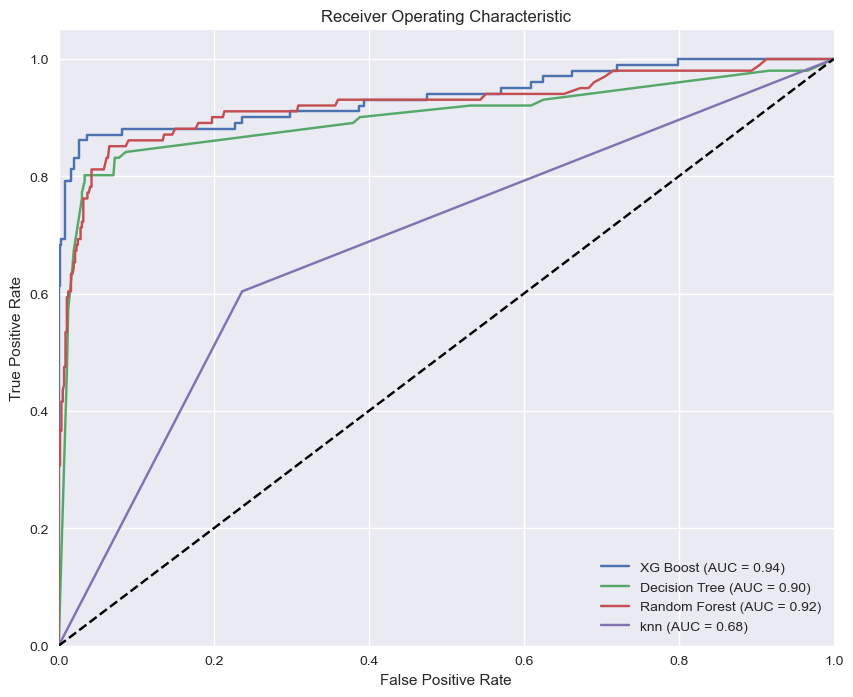

In [148]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Fit the models and make predictions
models = [xgboost, dt_model, rfc, knn]
model_names = ['XG Boost', 'Decision Tree', 'Random Forest', 'knn']
y_scores = []

for model in models:
    if model == rfc:
        y_scores.append(model.predict_proba(X_test)[:, 1])
    else:
        y_scores.append(model.predict_proba(X_test)[:, 1])

# Plot the ROC curves
plt.figure(figsize=(10, 8))

for i in range(len(models)):
    fpr, tpr, _ = roc_curve(y_test, y_scores[i])
    auc = roc_auc_score(y_test, y_scores[i])
    plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [149]:
models = [xgboost, dt_model, rfc, knn]

results = pd.DataFrame(columns=["Models", "F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model, X_test, y_test, cv=10, scoring="f1_weighted").mean()
    result = pd.DataFrame([[names, f1 * 100]], columns=["Models", "F1"])
    results = pd.concat([results, result], ignore_index=True)

results.sort_values(by="F1",ascending=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

BuckarooWidget(commandConfig={'argspecs': {'dropcol': [None], 'to_datetime': [None], 'safeint': [None], 'filln…

### 7.1 Interpretation of Results 

We looked at four different models: Decision Tree, Random Forest, KNN, and XG Boost. We assessed their performance using two metrics: F1-score and Test ROC AUC Score.<BR>

The F1-score tells us how well the model can make accurate predictions for both the positive and negative outcomes. <br>
A higher F1-score means better prediction accuracy. Among the four models we evaluated, XG Boost had the highest F1-score of 0.84, which indicates that it can make more accurate predictions compared to the other models.

The Test ROC AUC Score measures how well the model can distinguish between the positive and negative outcomes.<br>
It thus tells us how well the model can separate the two types of predictions. In our case, XG Boost again had the highest Test ROC AUC Score of 0.895, indicating that it can better differentiate between the positive and negative outcomes.<br>

Based on these metrics, we can say that XG Boost performed the best among the models we evaluated. It showed higher accuracy in making predictions and better ability to distinguish between different outcomes.<br>

**XG Boost is our selected Model**

### 7.2 Optimizing XGBoost Tuning

# 8.0 Conclusions

# 9.0 Recommendations